<h1 align = 'center'> LASSO Regularisation </h1>

### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [2]:
X,y = make_regression(n_samples= 100, n_features=1, n_targets=1, n_informative=1, noise=20, random_state= 13)

### Train test split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

### Linear Regression 

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#### Performance metric

In [8]:
from sklearn.metrics import r2_score

In [9]:
print("r2_score = ",r2_score(y_test, y_pred))
print("Intercept = ",lr.intercept_)
print("Coefficent = ", lr.coef_)

r2_score =  0.6345158782661013
Intercept =  -2.271014426178382
Coefficent =  [28.12597332]


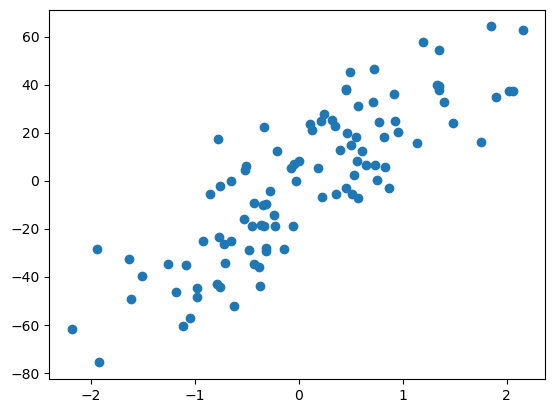

In [10]:
plt.scatter(X,y)

### <font color = 'red'> Lasso Regularisation </font>

In [11]:
from sklearn.linear_model import Lasso

C:\Users\Amruta\AppData\Local\Temp\ipykernel_7096\4200309477.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,y_train)
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+04, tolerance: 8.397e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


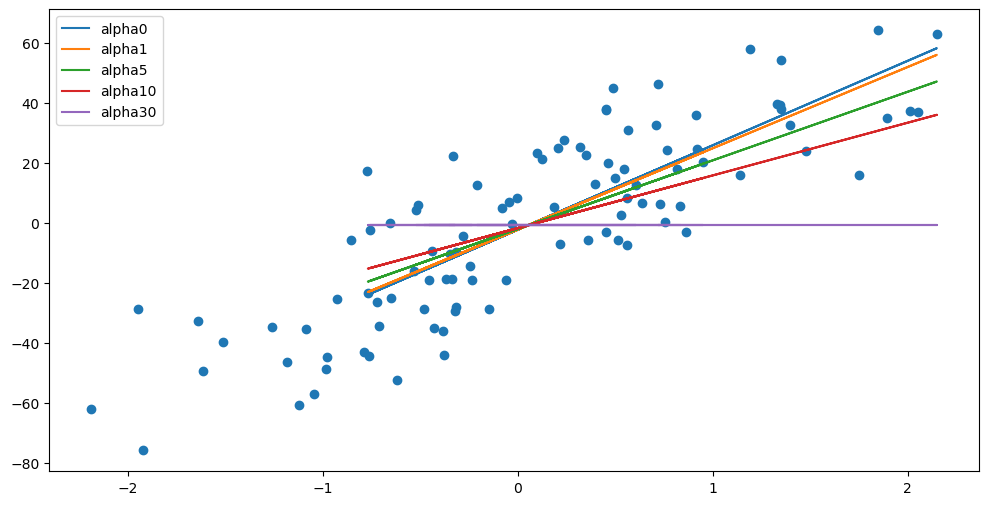

In [21]:
alpha =[0,1, 5, 10, 30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)

for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    plt.plot(X_test, lasso.predict(X_test),label="alpha{}".format(i))
plt.legend()
plt.show()

- Here as alpha value increses w shrink and slope change 
- As alpha become too high (here apha= 30) slop completly become zero which was not the case for l2 regularization

### Polynomial Regression

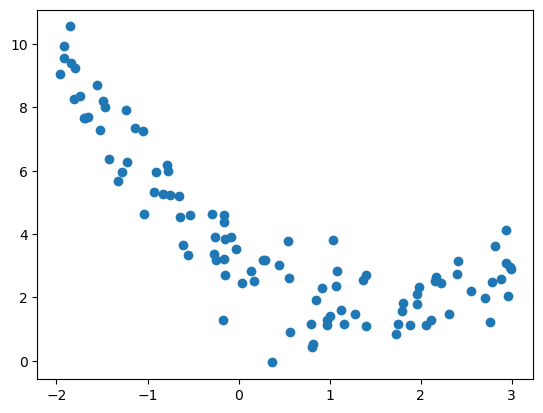

In [14]:
m = 100
x1 = 5* np.random.rand(m,1)-2
x2 = 0.7 * x1**2 - 2 *x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

### <font color='red'>Regularization for Polynomial regression</font>

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Amruta\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.322e+01, tolerance: 6.609e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fa

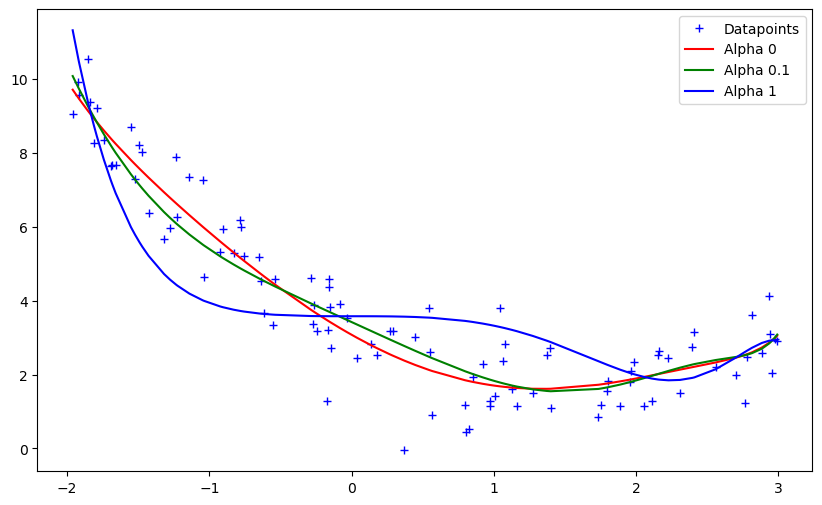

In [22]:
def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('lasso',Lasso(alpha=alpha))
            ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs =['r', 'g','b']
plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    
    #visualization
    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:, 0])], c, label ="Alpha {}".format(alpha))
plt.legend()
plt.show()

- For alpha = 0 it similar to polynomial regression without regularization 
- for alpha = 0.1 it is slightly better than previous one
- for greater value of alpha it started to overfit